# Computer Network: Network Simulation using NS2
> __Morteza Nouri, 810198481__ <br>
> __Seyed Mohammad Amin Atyabi, 810198559__

## Goals
- Creating network topology and simulating it with NS2
- Getting familiar with different layers of network (e.g, UDP, TCP, etc.)
- Getting familiar with wireless networks especially 802.11 (WiFi)
- Measuring performance metrics of networks
- Impact of Error rate on Throughput, Packet Transfer Ratio and End-to-End delay

## Description:
> __Network Topology:__<br>


## Results:



In [5]:
import os
import random
import matplotlib.pyplot as plt
from Analyzer import Analyzer

TCL = 'WLan.tcl'

### Scenario 1:
- generating 10 different error rates between 0.000001 and 0.00001 and detecting impact of that on other performance metrics

In [ ]:
# Default args
BANDWIDTH = '1Mb'
PACKETSIZE = '1024'

# Scenario 1: give 10 different error rates between 0.000001 and 0.00001 and detect impact on performance parameters
err_rates = []
for i in range(10):
    err_rates.append(random.uniform(0.00001, 0.000001))
    
err_rates.sort()
throughput = []
transfer_ratio = []
avg_delay = []
for err_rate in err_rates:
    prog = TCL + ' ' + BANDWIDTH + ' ' + PACKETSIZE + ' ' + str(err_rate)
    command = 'ns' + ' ' + prog
    os.system(command)
    analyzer = Analyzer('traces/' + BANDWIDTH + '-' + PACKETSIZE + '-' + str(err_rate) + '.tr')
    analyzer.parse()
    throughput.append(analyzer.throughput())
    transfer_ratio.append(analyzer.packet_transfer_ratio())
    avg_delay.append(analyzer.avg_end_to_end_delay())

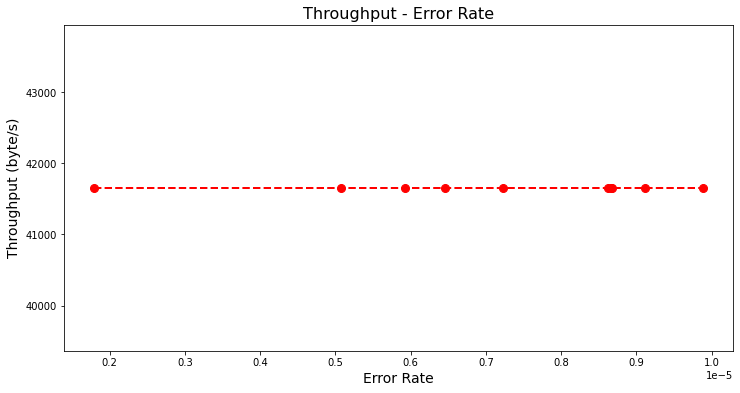

In [7]:
plt.rcParams["figure.figsize"] = (12, 6) 

plt.plot(err_rates, throughput, color='red', linestyle='dashed', linewidth=2, marker='o', markerfacecolor='red', markersize=8)
plt.xlabel('Error Rate', fontsize=14)
plt.ylabel('Throughput (byte/s)', fontsize=14)
plt.title('Throughput - Error Rate', fontsize=16)
plt.savefig("Throughput-ErrorRate")

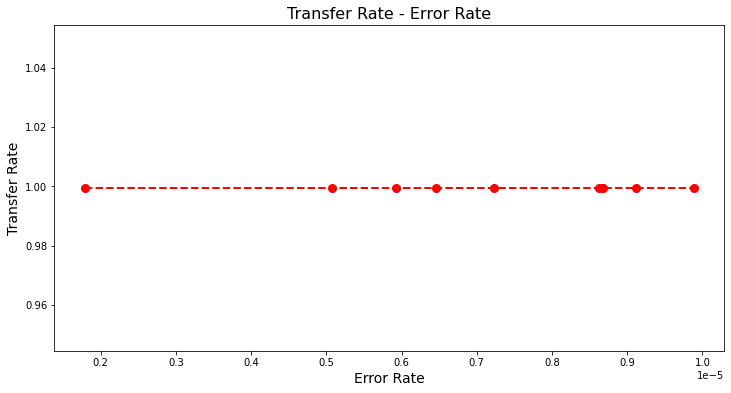

In [8]:
plt.plot(err_rates, transfer_ratio, color='red', linestyle='dashed',
         linewidth=2, marker='o', markerfacecolor='red', markersize=8)
plt.xlabel('Error Rate', fontsize=14)
plt.ylabel('Transfer Rate', fontsize=14)
plt.title('Transfer Rate - Error Rate', fontsize=16)
plt.savefig("TransferRate-ErrorRate")

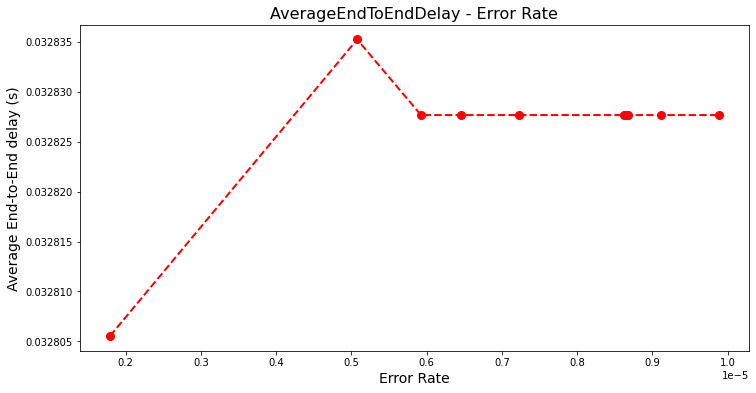

In [9]:
plt.plot(err_rates, avg_delay, color='red', linestyle='dashed',
         linewidth=2, marker='o', markerfacecolor='red', markersize=8)
plt.xlabel('Error Rate', fontsize=14)
plt.ylabel('Average End-to-End delay (s)', fontsize=14)
plt.title('AverageEndToEndDelay - Error Rate', fontsize=16)
plt.savefig("AverageEndToEndDelay-ErrorRate")

### Scenario 2:
- In this section, we train out network for different packet sizes. (assuming other parameters are fixed)

In [ ]:
# Default args
BANDWIDTH = '1Mb'
ERROR_RATE = '0.00001'
    
packet_sizes = [128, 256, 512, 1024, 1500, 1800,  2048, 4096]
throughput = []
transfer_ratio = []
avg_delay = []
for psize in packet_sizes:
    prog = TCL + ' ' + BANDWIDTH + ' ' + str(psize) + ' ' + ERROR_RATE
    command = 'ns' + ' ' + prog
    os.system(command)
    analyzer = Analyzer('traces/' + BANDWIDTH + '-' + str(psize) + '-' + ERROR_RATE + '.tr')
    analyzer.parse()
    throughput.append(analyzer.throughput())
    transfer_ratio.append(analyzer.packet_transfer_ratio())
    avg_delay.append(analyzer.avg_end_to_end_delay())

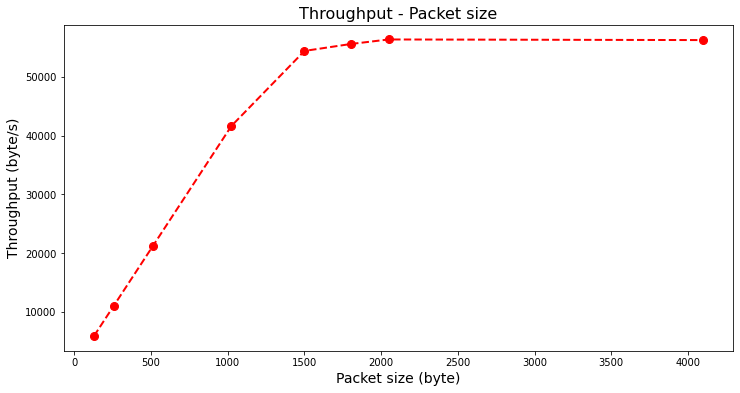

In [11]:
plt.plot(packet_sizes, throughput, color='red', linestyle='dashed', linewidth=2, marker='o', markerfacecolor='red', markersize=8)
plt.xlabel('Packet size (byte)', fontsize=14)
plt.ylabel('Throughput (byte/s)', fontsize=14)
plt.title('Throughput - Packet size', fontsize=16)
plt.savefig("Throughput-Packet size")

__Inference:__ _A UDP agent accepts data in variable size chunks from an application, and segments the data if needed.The default maximum segment size (MSS) for UDP agents is 1000 byte but we change this value to 2048 bytes. So when packet size becomes larger than MSS, the throughput doesn't increase anymore, even decreases a little. beacause count of sending packets increases, thus network get congested and packet loss increases. We can observe the influence on transfer ratio in below figure._


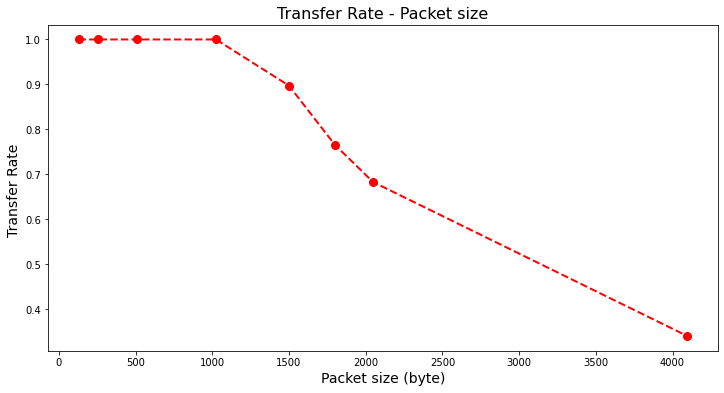

In [12]:
plt.plot(packet_sizes, transfer_ratio, color='red', linestyle='dashed', linewidth=2, marker='o', markerfacecolor='red', markersize=8)
plt.xlabel('Packet size (byte)', fontsize=14)
plt.ylabel('Transfer Rate ', fontsize=14)
plt.title('Transfer Rate - Packet size', fontsize=16)
plt.savefig("Transfer Rate-Packet size")

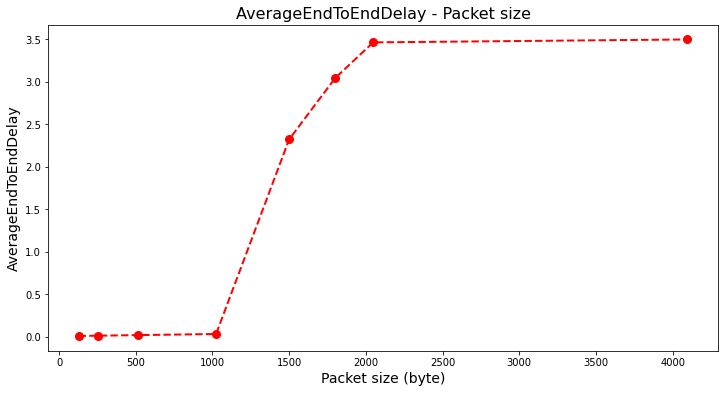

In [13]:
plt.plot(packet_sizes, avg_delay, color='red', linestyle='dashed', linewidth=2, marker='o', markerfacecolor='red', markersize=8)
plt.xlabel('Packet size (byte)', fontsize=14)
plt.ylabel('AverageEndToEndDelay', fontsize=14)
plt.title('AverageEndToEndDelay - Packet size', fontsize=16)
plt.savefig("AverageEndToEndDelay-Packet size")